# Problem and data explanation

The dataset provided for this task consists of two files; train.csv and test.csv. The first one contatins 9557 rows and 143 columns, the second one has 23856(!) rows and 142 columns (missing target). The target column represents the poverty in four levels (scale 1 to 4).

"Important note: while all members of a household should have the same label in the training data, there are errors where individuals in the same household have different labels. In these cases, we are told to use the label for the head of each household, which can be identified by the rows where parentesco1 == 1.0. We will cover how to correct this in the notebook (for more info take a look at the competition main discussion).

The Target values represent poverty levels as follows:

1 = extreme poverty 
2 = moderate poverty 
3 = vulnerable households 
4 = non vulnerable households"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [57]:
# read data
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
pd.options.display.max_columns = len(train_data.columns)
train_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


130 integer columns, 8 float and 5 of an object. Some of the integer columns might represent boolean values.
So... let's visualize the number of unique values in every int-like column

# Integer columns

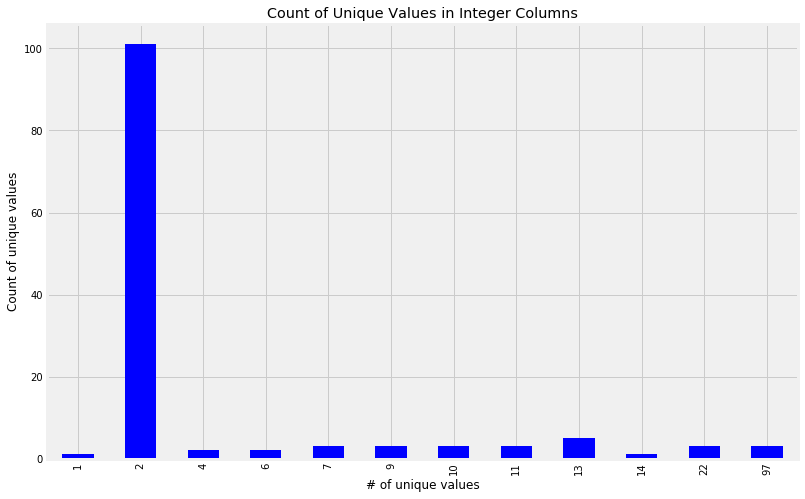

In [25]:
#unique_ints = train_data.select_dtypes(include = np.int64).nunique().value_counts().sort_index()
#fig, ax = plt.subplots(figsize=(16, 9))
#ax.bar(unique_ints.index, unique_ints, color='blue', linewidth = 2)
#unique_ints.head()
train_data.select_dtypes(include = np.int64).nunique().value_counts().sort_index().plot.bar(
    color='blue', linewidth = 2, figsize=(12, 8)
)
plt.xlabel('# of unique values')
plt.ylabel('Count of unique values')
plt.title('Count of Unique Values in Integer Columns')

# Float columns

In [26]:
from collections import OrderedDict

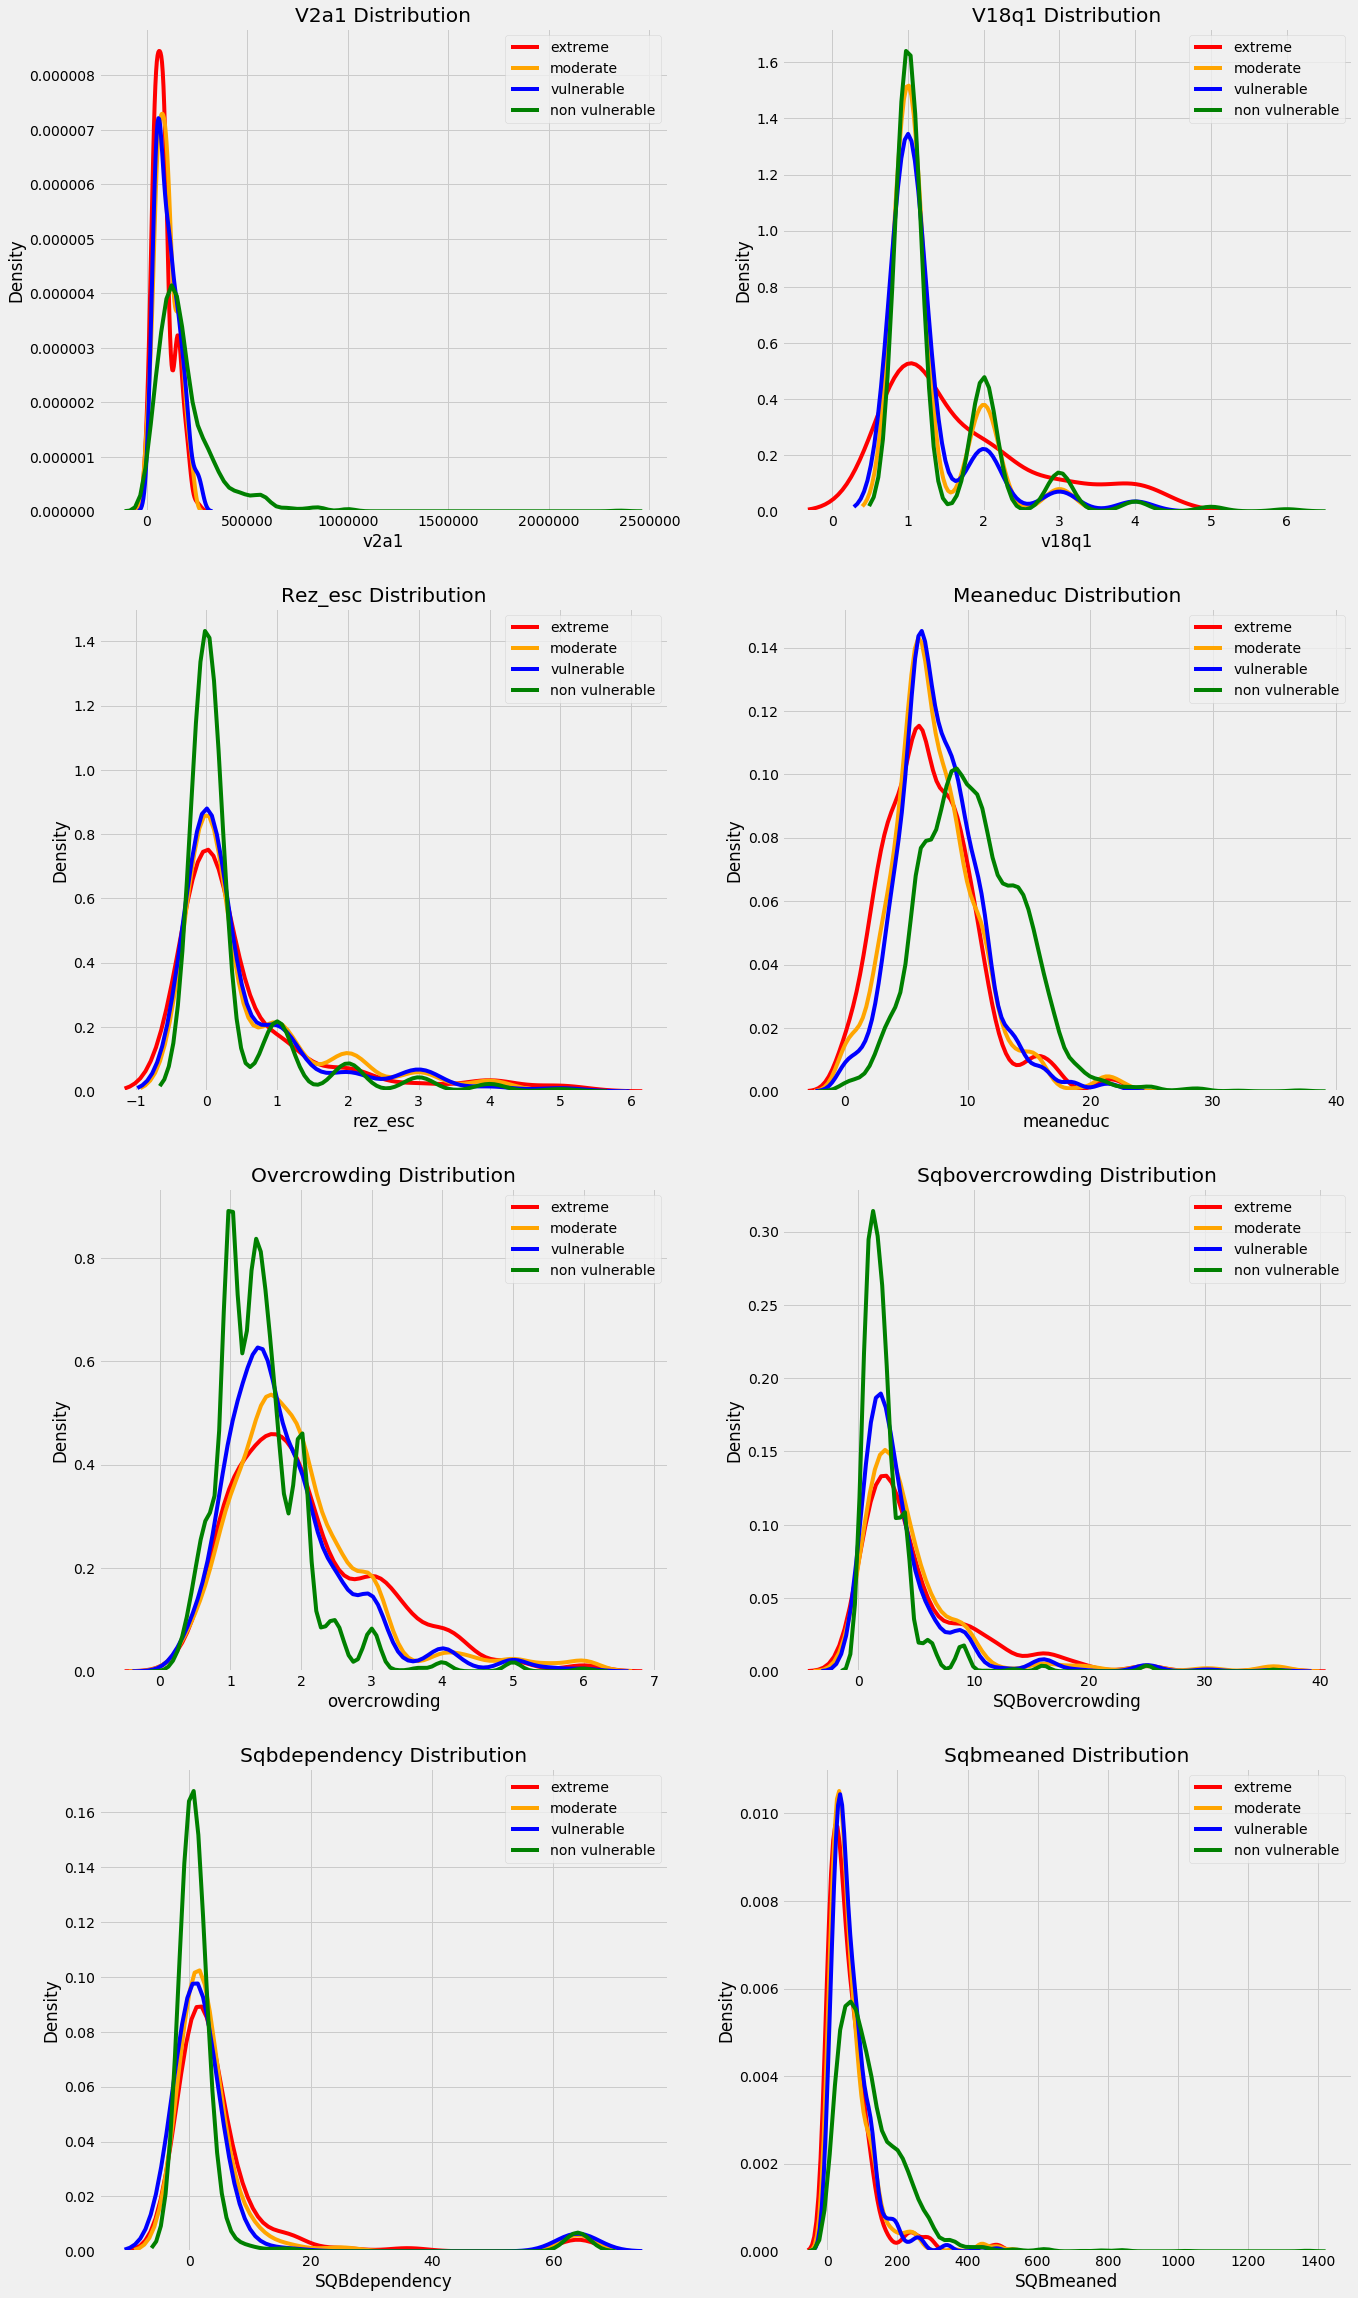

In [36]:
fig, ax = plt.subplots(4, 2, figsize=(20, 16))
ax = ax.flatten()
# Color mapping
colors = OrderedDict(
    {1: 'red', 2: 'orange', 3: 'blue', 4: 'green'}
)
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

for i, col in enumerate(train_data.select_dtypes(np.float64)):
    curr_ax = ax[i]
    # Iterate through the poverty levels
    for poverty_lvl, color in colors.items():
        curr_data = train_data.loc[train_data.Target == poverty_lvl, col].dropna()
        sns.kdeplot(curr_data, ax=curr_ax, color=color, label=poverty_mapping[poverty_lvl])
    curr_ax.set_title(f'{col.capitalize()} Distribution')
    curr_ax.set_xlabel(f'{col}')
    curr_ax.set_ylabel('Density')
plt.subplots_adjust(top = 2)

# Object columns

In [37]:
train_data.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [58]:
mapping = {'yes': 1, 'no': 0}
columns = ['dependency', 'edjefe', 'edjefa']
for df in [train_data, test_data]:
    for col in columns:
        df[col] = df[col].replace(mapping).astype(np.float64)

In [59]:
train_data[columns].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.149550,5.096788,2.896830
std,1.605993,5.246513,4.612056
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


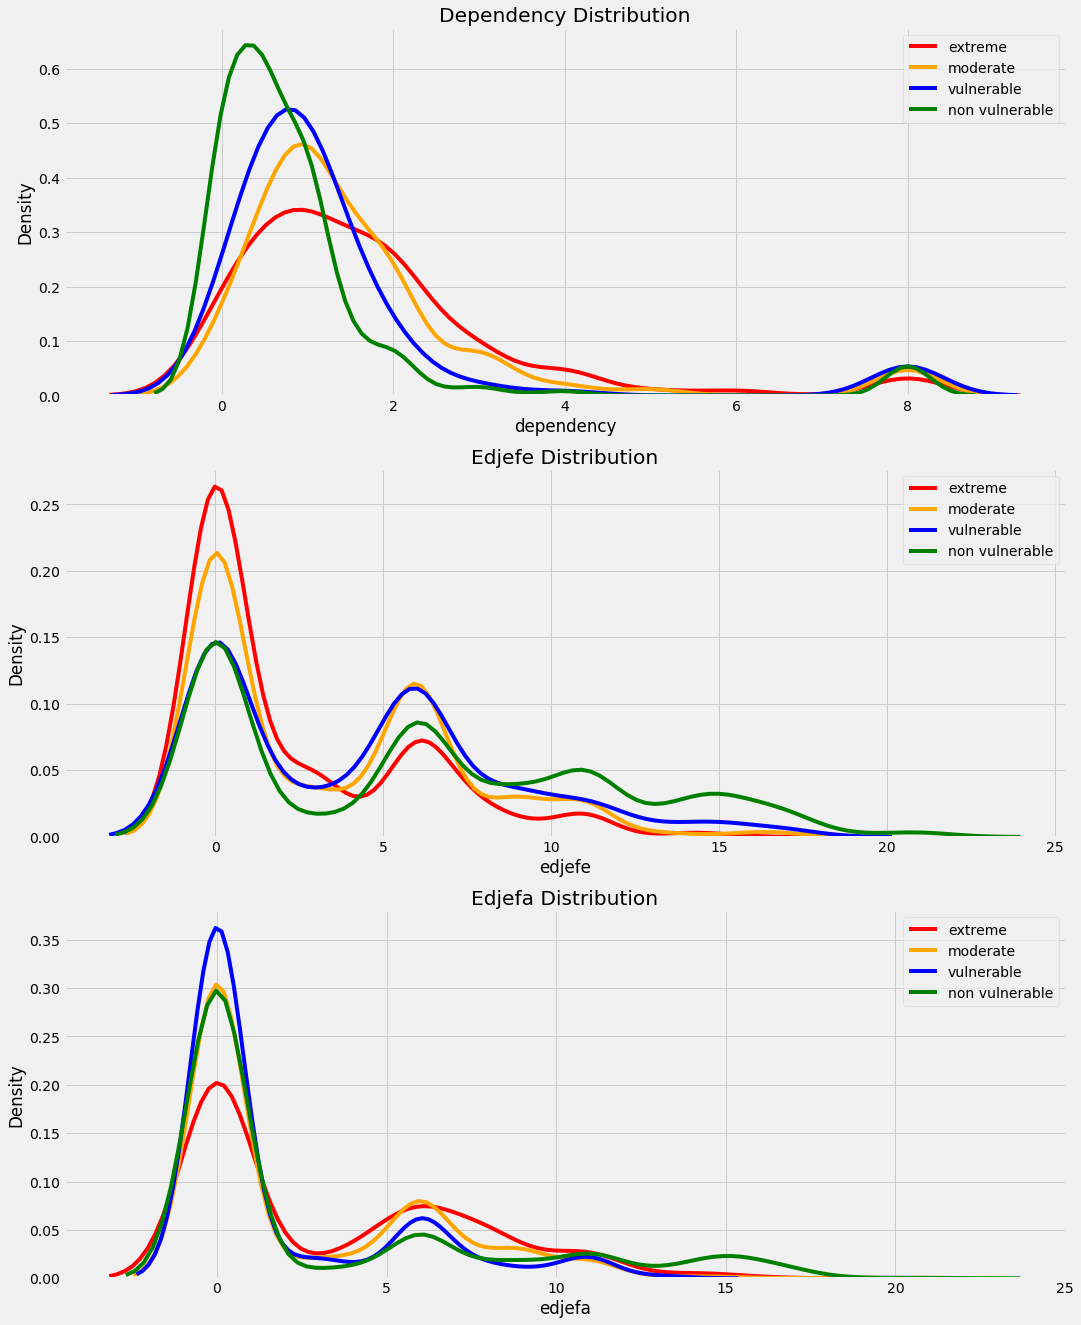

In [60]:
fig, ax = plt.subplots(3, 1, figsize=(16, 9))

for i, col in enumerate(columns):
    curr_ax = ax[i]
    for poverty_lvl, color in colors.items():
        curr_data = train_data.loc[train_data.Target == poverty_lvl, col].dropna()
        sns.kdeplot(
            curr_data, ax = curr_ax, color=color, label=poverty_mapping[poverty_lvl]
        )
    curr_ax.set_title(f'{col.capitalize()} Distribution')
    curr_ax.set_xlabel(f'{col}')
    curr_ax.set_ylabel('Density')
plt.subplots_adjust(top = 2)

In [61]:
# merge datasets for feature engineering
test_data['Target'] = np.nan
data = train_data.append(test_data, ignore_index=True)

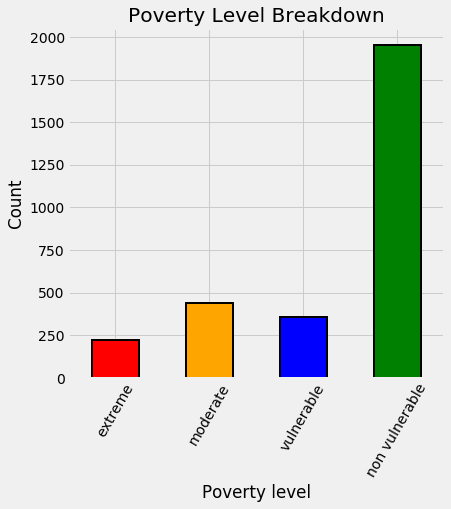

In [70]:
heads_of_household = data.loc[data.parentesco1 == 1].copy()

# labels for training
train_labels = data.loc[data.Target.notnull() & (data.parentesco1 == 1), ['Target', 'idhogar']]

# value counts of target
label_counts = train_labels.Target.value_counts().sort_index()

# Bar plot of occurences of each label
label_counts.plot.bar(
    color=colors.values(), figsize=(6, 6), edgecolor='k', linewidth=2
)
plt.xlabel('Poverty level')
plt.ylabel('Count')
plt.xticks(
    [x - 1 for x in poverty_mapping.keys()],
    list(poverty_mapping.values()),
    rotation=60
)
plt.title('Poverty Level Breakdown')

"Addressing Wrong Labels
As with any realistic dataset, the Costa Rican Poverty data has some issues. Typically, 80% of a data science project will be spent cleaning data and fixing anomalies/errors. These can be either human entry errors, measurement errors, or sometimes just extreme values that are correct but stand out. For this problem, some of the labels are not correct because individuals in the same household have a different poverty level. We're not told why this may be the case, but we are told to use the head of household as the true label."

In [71]:
all_equal = train_data.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

In [77]:
not_equal = all_equal[all_equal != True]
print('There are {} households where we spotted differences between poverty levels of family members'.format(len(not_equal)))

There are 85 households where we spotted differences between poverty levels of family members


In [79]:
train_data[train_data.idhogar == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [86]:
# Households without leaders
households_leaders = train_data.groupby('idhogar')['parentesco1'].sum()

# Find those without heads
households_no_head = train_data.loc[train_data.idhogar.isin(households_leaders[households_leaders == 0].index), ['idhogar', 'Target']]
print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [87]:
# find household without a head, where labels are different
households_no_head_equal = households_no_head.groupby('idhogar').Target.apply(lambda x: x.nunique() == 1)
print('There are {} households without a head where labels are different.'.format(
    sum(households_no_head_equal == False)
    )
)

There are 0 households without a head where labels are different.


In [96]:
# Correct households that have different poverty levels
# and have a head member
for idhogar in not_equal.index:
    true_target = train_data[(train_data.idhogar == idhogar) & (train_data.parentesco1 == 1)]['Target']
    train_data.loc[(train_data.idhogar == idhogar), 'Target'] = true_target

#group by a household to learn the number of unique values
all_equal = train_data.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.
